In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
from statsmodels.stats.anova import anova_lm

In [2]:
data_all_years = pd.read_csv('data_all.csv', sep = ',')
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years = data_all_years.drop(data_all_years.index[569])


In [3]:
predictors = ["exit_velocity_avg", "launch_angle_avg" ,"sweet_spot_percent", "barrels", "barrel_batted_rate", "solidcontact_percent", "flareburner_percent", "poorlyunder_percent", "poorlytopped_percent", "poorlyweak_percent", "hard_hit_percent", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent", "oz_contact_percent", "out_zone_swing_miss", "out_zone_swing", "out_zone_percent", "out_zone", "meatball_swing_percent", "meatball_percent", "pitch_count_offspeed", "pitch_count_fastball", "pitch_count_breaking", "pitch_count", "iz_contact_percent", "in_zone_swing_miss", "in_zone_swing", "in_zone_percent", "in_zone", "edge_percent", "edge", "whiff_percent", "swing_percent", "pull_percent", "straightaway_percent", "opposite_percent", "batted_ball", "f_strike_percent", "groundballs_percent", "groundballs", "flyballs_percent", "flyballs", "linedrives_percent", "linedrives", "popups_percent", "popups", "n_bolts", "sprint_speed", "UBR"]


<ipython-input-4-8602c0d596a6>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


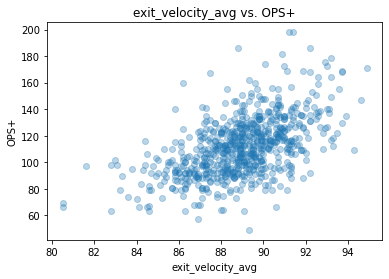

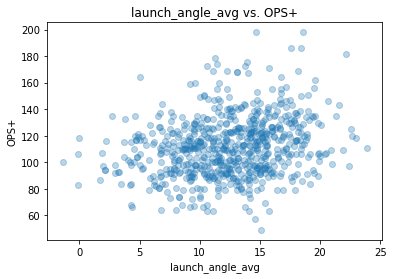

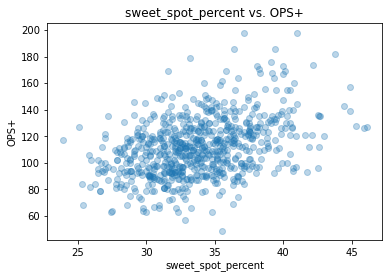

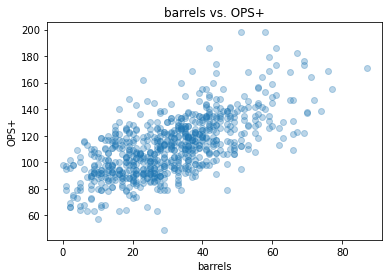

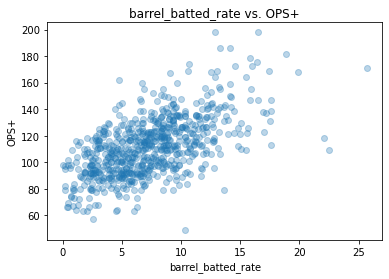

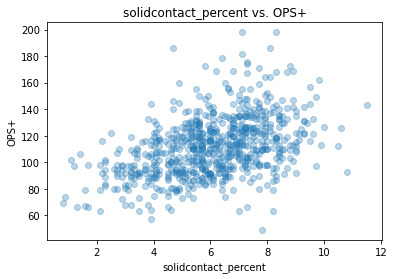

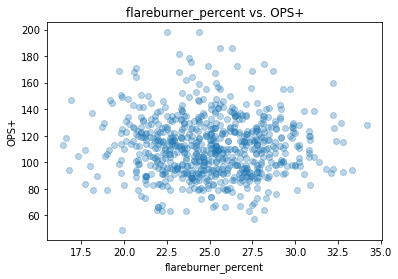

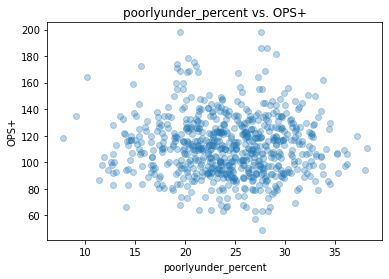

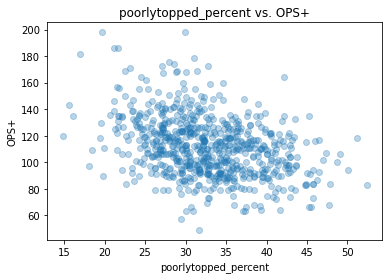

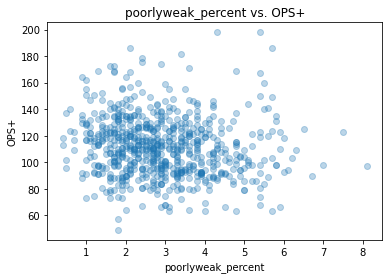

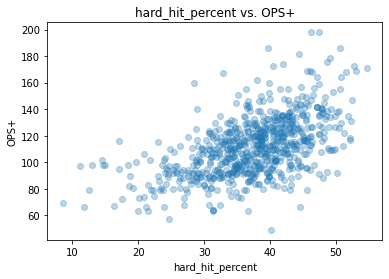

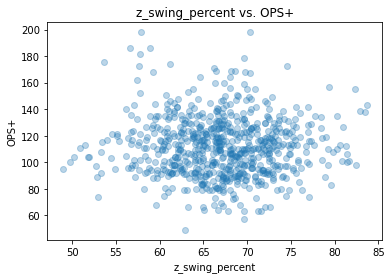

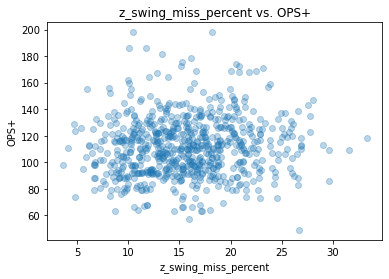

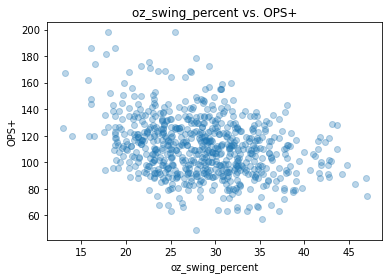

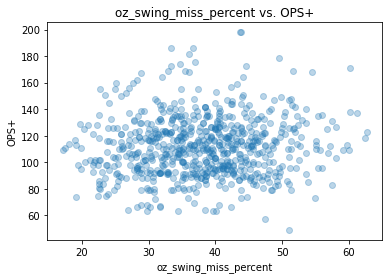

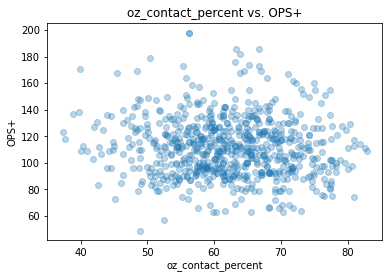

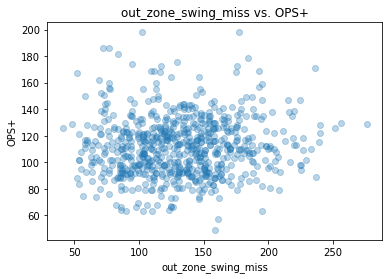

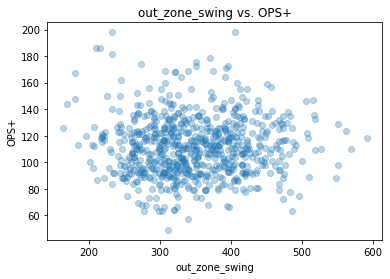

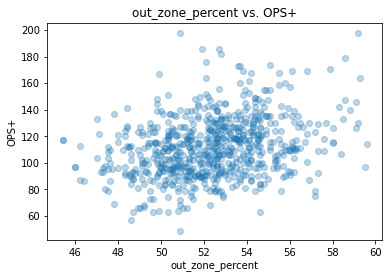

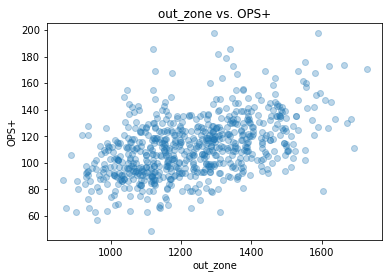

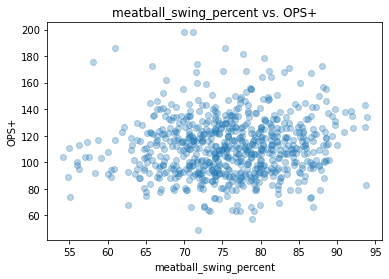

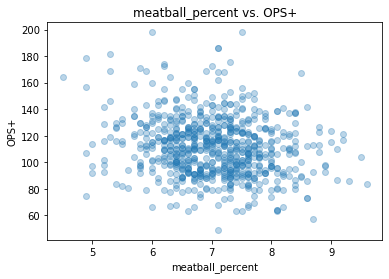

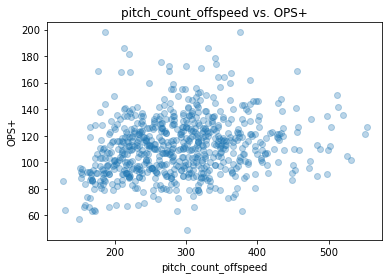

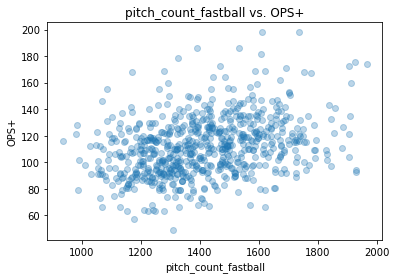

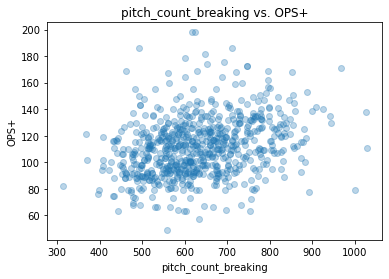

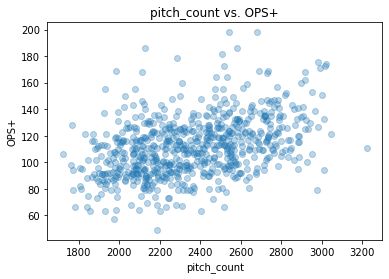

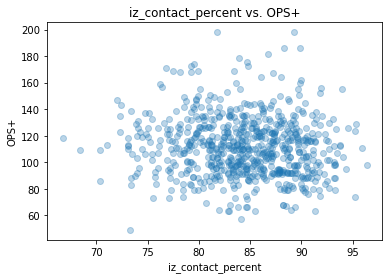

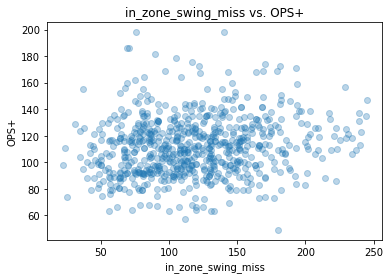

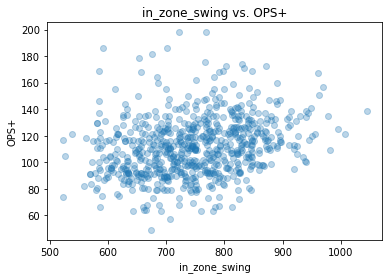

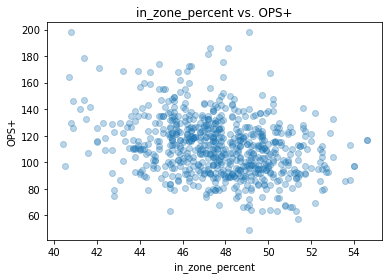

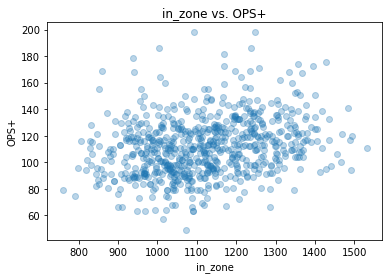

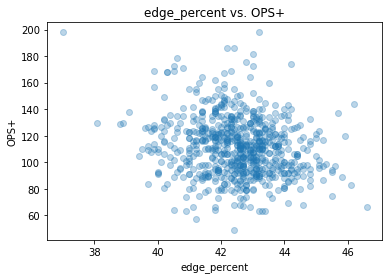

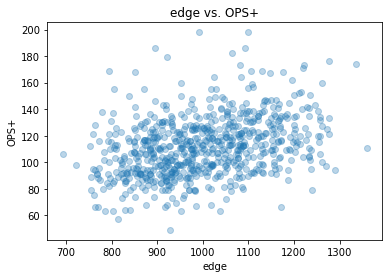

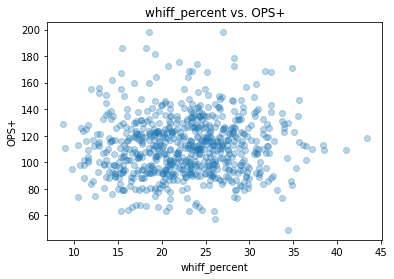

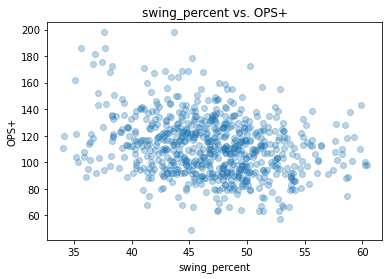

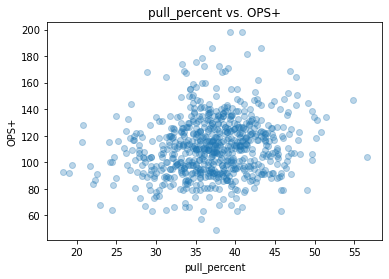

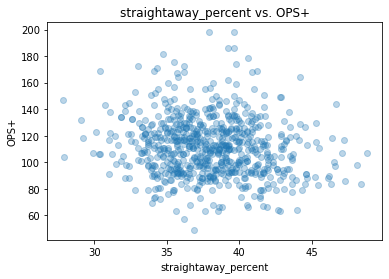

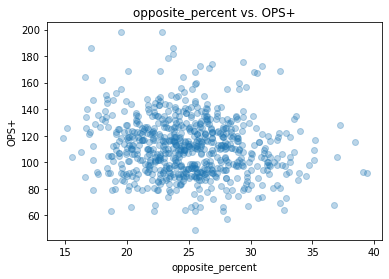

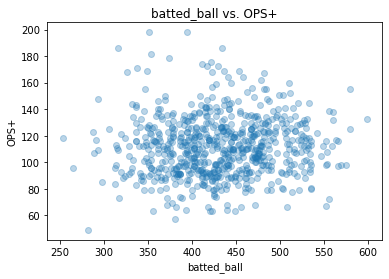

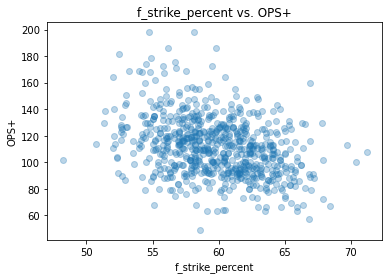

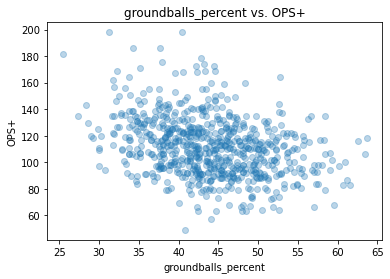

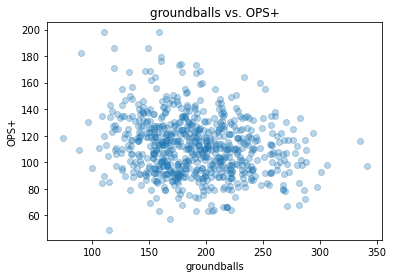

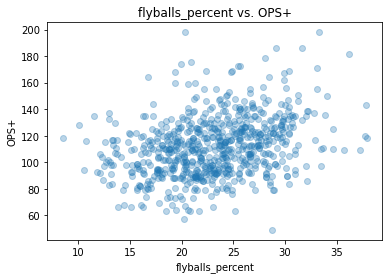

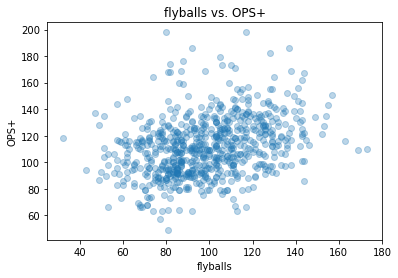

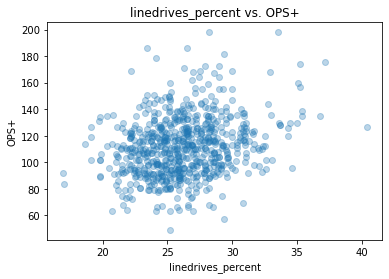

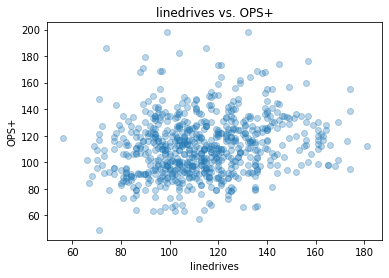

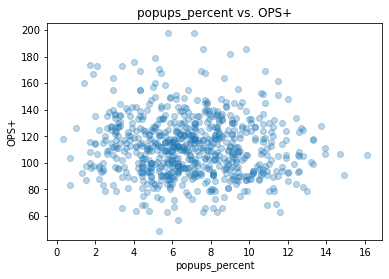

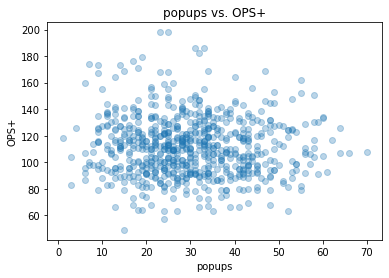

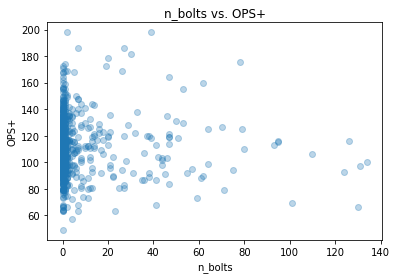

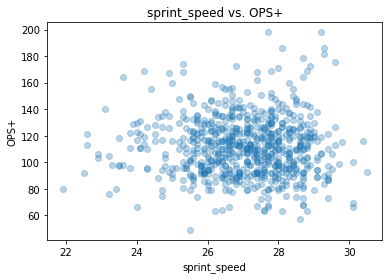

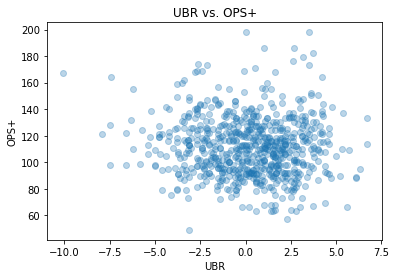

In [4]:
i = 0
for x in predictors:
  plt.figure(i)
  plt.scatter(data_all_years[x], data_all_years['OPS_Plus'],alpha = 0.3)
  plt.xlabel(x)
  plt.ylabel('OPS+')
  plt.title(x + ' vs. OPS+')
  i = i + 1

In [5]:
X = np.array(data_all_years[["exit_velocity_avg","launch_angle_avg","barrels", "solidcontact_percent", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent","out_zone", "pitch_count","in_zone","edge", "swing_percent", "groundballs_percent", "flyballs_percent"]])

In [6]:
import statsmodels.api as sm

In [7]:
ops_plus_model = sm.OLS(data_all_years['OPS_Plus'],X)
ops_plus_model_results = ops_plus_model.fit()
print(ops_plus_model_results.pvalues)

x1     4.596582e-27
x2     2.536942e-06
x3     3.234170e-22
x4     6.678039e-01
x5     1.419493e-04
x6     1.242934e-06
x7     1.490660e-03
x8     5.464901e-01
x9     8.058829e-01
x10    8.529366e-01
x11    2.163900e-02
x12    3.058783e-01
x13    1.785953e-04
x14    2.227369e-05
dtype: float64


Based on the above p - value output, it seems that we can remove some of the predictors that are insignificant but we have to make sure this is safe to do using a one-way anova test, by testing the insignisifcant predictors against the whole model. 

From the above it seems that there are 5 insignificant predictors(based off of a minimal significance p-value threshold of 0.05 or below). These are: 

1. solidcontact_percent(with p-value = 0.6678)

2. pitch_count(with p-value = 0.5465)

3. in_zone(with p-value = 0.8059)

4. edge(with p-value = 0.8529)

5. swing_percent (with p-value = 0.3059)

In [8]:
# Make a reduced model without the above predictors

ops_plus_preds_red = np.array(data_all_years[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent","out_zone", "groundballs_percent", "flyballs_percent"]])

ops_plus_model_red = sm.OLS(data_all_years['OPS_Plus'],ops_plus_preds_red)
ops_plus_model_red_results = ops_plus_model_red.fit()

In [9]:
# Running the anova model to test whether it is ok to remove these five predictors all at once

anovatest = anova_lm(ops_plus_model_red_results, ops_plus_model_results)
print(anovatest)

   df_resid            ssr  df_diff      ss_diff         F    Pr(>F)
0     695.0  165766.208613      0.0          NaN       NaN       NaN
1     690.0  161247.660519      5.0  4518.548095  3.867093  0.001833


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


From the above anova result it is apparent that there is at least one significant predictor that is contibuting to the overall model, therefore further testing has to be done via incremementally reducing the full model by one predictor and running the same comparison process until a satisfactory result is acheived. This has to be done becuase we cannot conclusively remove all 5 predictors at the same time.

In [10]:
# Second round of testing for insiginificant predictors

ops_plus_preds_red_2 = np.array(data_all_years[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent","out_zone", "pitch_count","in_zone","edge", "swing_percent", "groundballs_percent", "flyballs_percent"]])

ops_plus_model_red_2 = sm.OLS(data_all_years['OPS_Plus'],ops_plus_preds_red_2)
ops_plus_model_red_results_2 = ops_plus_model_red_2.fit()

print(ops_plus_model_red_results_2.tvalues)
print(ops_plus_model_red_results_2.pvalues)

x1     11.245831
x2     -4.730498
x3     10.290776
x4     -3.804685
x5     -5.539682
x6     -3.175103
x7      0.575966
x8      0.265576
x9     -0.214650
x10    -2.276699
x11    -1.077820
x12    -3.745986
x13    -4.430098
dtype: float64
x1     4.621825e-27
x2     2.716547e-06
x3     3.318409e-23
x4     1.545666e-04
x5     4.310413e-08
x6     1.564368e-03
x7     5.648259e-01
x8     7.906447e-01
x9     8.301036e-01
x10    2.310917e-02
x11    2.814902e-01
x12    1.946749e-04
x13    1.094903e-05
dtype: float64


In [11]:
anovatest = anova_lm(ops_plus_model_red_results_2, ops_plus_model_results)
print(anovatest)

   df_resid            ssr  df_diff  ss_diff        F    Pr(>F)
0     691.0  161290.739318      0.0      NaN      NaN       NaN
1     690.0  161247.660519      1.0  43.0788  0.18434  0.667804


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


As it turns out there seems to be at least one other predictor which is causing the model to be insignificant, so we will proceed as above, and remove one more insignificant predictor, in this case it will be "out_zone" with a large p-value of 0.5648.

We will create another reduced model without this predictor and instead of comparing to the original full model, we will use the above, ops_plus_preds_red_2 model as the "full" model. 

In [12]:
ops_plus_preds_red_3 = np.array(data_all_years[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone","edge", "swing_percent", "groundballs_percent", "flyballs_percent"]])

ops_plus_model_red_3 = sm.OLS(data_all_years['OPS_Plus'],ops_plus_preds_red_3)
ops_plus_model_red_results_3 = ops_plus_model_red_3.fit()

print(ops_plus_model_red_results_3.tvalues)
print(ops_plus_model_red_results_3.pvalues)

x1     11.292204
x2     -4.728677
x3     10.353022
x4     -3.789595
x5     -5.549224
x6     -3.133861
x7      3.834110
x8     -2.954288
x9     -2.208805
x10    -1.103730
x11    -3.799642
x12    -4.594449
dtype: float64
x1     2.941861e-27
x2     2.739512e-06
x3     1.882599e-23
x4     1.640392e-04
x5     4.089123e-08
x6     1.798105e-03
x7     1.375104e-04
x8     3.240279e-03
x9     2.751513e-02
x10    2.700938e-01
x11    1.576605e-04
x12    5.156068e-06
dtype: float64


In [13]:
anovatest = anova_lm(ops_plus_model_red_results_3, ops_plus_model_red_results_2)
print(anovatest)

   df_resid            ssr  df_diff   ss_diff         F    Pr(>F)
0     692.0  161368.172048      0.0       NaN       NaN       NaN
1     691.0  161290.739318      1.0  77.43273  0.331736  0.564826


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Looks like there is still at least one predictor that is still insignificant so we will proceed with another round of testing while also removing the "swing_percent" predictor with a  p-value of 0.2700. Just like in the second trial through, we will create a new reduced model and compare to ops_plus_preds_red_3. 

In [14]:
ops_plus_preds_red_4 = np.array(data_all_years[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone","edge", "groundballs_percent", "flyballs_percent"]])

ops_plus_model_red_4 = sm.OLS(data_all_years['OPS_Plus'],ops_plus_preds_red_4)
ops_plus_model_red_results_4 = ops_plus_model_red_4.fit()

print(ops_plus_model_red_results_4.tvalues)
print(ops_plus_model_red_results_4.pvalues)

x1     11.478405
x2     -4.685093
x3     10.320959
x4     -3.718932
x5     -5.438459
x6     -7.224670
x7      4.069550
x8     -3.323442
x9     -2.158075
x10    -3.876696
x11    -4.759979
dtype: float64
x1     4.832395e-28
x2     3.368870e-06
x3     2.502811e-23
x4     2.162440e-04
x5     7.456829e-08
x6     1.327888e-12
x7     5.252663e-05
x8     9.358959e-04
x9     3.126486e-02
x10    1.159506e-04
x11    2.357891e-06
dtype: float64


In [15]:
anovatest = anova_lm(ops_plus_model_red_results_4, ops_plus_model_red_results_3)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff        F    Pr(>F)
0     693.0  161652.250092      0.0         NaN      NaN       NaN
1     692.0  161368.172048      1.0  284.078044  1.21822  0.270094


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Removing "swing_percent" was not enough and as a result it seems that there is still some insignificance, so we will repeat the above process, and create a new reduced model by removing "edge." Hopefully this will yield a significant result.

In [16]:
ops_plus_preds_red_5 = np.array(data_all_years[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent", "flyballs_percent"]])

ops_plus_model_red_5 = sm.OLS(data_all_years['OPS_Plus'],ops_plus_preds_red_5)
ops_plus_model_red_results_5 = ops_plus_model_red_5.fit()

print(ops_plus_model_red_results_5.tvalues)
print(ops_plus_model_red_results_5.pvalues)

x1     11.382162
x2     -4.637657
x3     10.542717
x4     -3.708513
x5     -5.390924
x6     -6.975627
x7      3.810940
x8     -4.073068
x9     -3.853809
x10    -4.786351
dtype: float64
x1     1.219264e-27
x2     4.211481e-06
x3     3.311099e-24
x4     2.251300e-04
x5     9.617008e-08
x6     7.114629e-12
x7     1.507309e-04
x8     5.174968e-05
x9     1.270808e-04
x10    2.076459e-06
dtype: float64


In [17]:
anovatest = anova_lm(ops_plus_model_red_results_5, ops_plus_model_red_results_4)
print(anovatest)

   df_resid            ssr  df_diff     ss_diff         F    Pr(>F)
0     694.0  162738.629252      0.0         NaN       NaN       NaN
1     693.0  161652.250092      1.0  1086.37916  4.657286  0.031265


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [18]:

data_all_mod = data_all_years.copy()
data_all_mod["exit_velocity_avg^2"] = data_all_mod["exit_velocity_avg"] * data_all_mod["exit_velocity_avg"]
data_all_mod["launch_angle_avg^2"] = data_all_mod["launch_angle_avg"] * data_all_mod["launch_angle_avg"]
data_all_mod["barrels^2"] = data_all_mod["barrels"] * data_all_mod["barrels"]
data_all_mod["poorlytopped_percent^2"] = data_all_mod["poorlytopped_percent"] * data_all_mod["poorlytopped_percent"]
data_all_mod["hard_hit_percent^2"] = data_all_mod["hard_hit_percent"] * data_all_mod["hard_hit_percent"]
data_all_mod["oz_swing_percent^2"] = data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"]
data_all_mod["pitch_count^2"] = data_all_mod["pitch_count"] * data_all_mod["pitch_count"]
data_all_mod["in_zone^2"] = data_all_mod["in_zone"] * data_all_mod["in_zone"]

data_all_mod["groundballs_percent^2"] = data_all_mod["groundballs_percent"] * data_all_mod["groundballs_percent"]

data_all_mod["flyballs_percent^2"] = data_all_mod["flyballs_percent"] * data_all_mod["flyballs_percent"]
data_all_mod.head()

data_all_mod["exit_velocity_avg^3"] = data_all_mod["exit_velocity_avg"] * data_all_mod["exit_velocity_avg"] * data_all_mod["exit_velocity_avg"]

data_all_mod["launch_angle_avg^3"] = data_all_mod["launch_angle_avg"] * data_all_mod["launch_angle_avg"] * data_all_mod["launch_angle_avg"]

data_all_mod["oz_swing_percent^3"] = data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"]

data_all_mod["groundballs_percent^3"] = data_all_mod["groundballs_percent"] * data_all_mod["groundballs_percent"] * data_all_mod["groundballs_percent"] 

data_all_mod["oz_swing_percent^4"] = data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"]

X_2 = np.array(data_all_mod[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent","flyballs_percent","exit_velocity_avg^2","launch_angle_avg^2","barrels^2","poorlytopped_percent^2","hard_hit_percent^2","oz_swing_percent^2","pitch_count^2","in_zone^2","groundballs_percent^2","flyballs_percent^2" ]])


ops_plus_poly = sm.OLS(data_all_mod['OPS_Plus'],X_2)
ops_plus_poly = ops_plus_poly.fit()

print(ops_plus_poly.pvalues)



x1     1.713474e-07
x2     5.755557e-01
x3     8.163471e-04
x4     9.214778e-01
x5     7.096134e-01
x6     9.644376e-06
x7     2.410690e-01
x8     9.336248e-02
x9     2.241119e-03
x10    4.955662e-02
x11    8.984476e-03
x12    1.733862e-02
x13    4.027353e-01
x14    4.506954e-01
x15    4.884301e-01
x16    1.038829e-03
x17    4.814942e-01
x18    2.579614e-01
x19    1.268625e-02
x20    3.606826e-01
dtype: float64


In [19]:
#Anova test for first polynomial set
anovatest = anova_lm(ops_plus_model_red_results_5, ops_plus_poly)
print(anovatest)

   df_resid            ssr  df_diff      ss_diff         F   Pr(>F)
0     694.0  162738.629252      0.0          NaN       NaN      NaN
1     684.0  156477.033041     10.0  6261.596211  2.737099  0.00261


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [20]:
# Get rid of x13, x14, x15, x17, x18, x20 based on p-value output.
X_3 = np.array(data_all_mod[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent","flyballs_percent","exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2"]])


ops_plus_poly_2 = sm.OLS(data_all_mod['OPS_Plus'],X_3)
ops_plus_poly_2 = ops_plus_poly_2.fit()

print(ops_plus_poly_2.pvalues)

x1     4.347350e-10
x2     5.635378e-01
x3     5.017035e-24
x4     6.720393e-04
x5     5.077586e-03
x6     1.004947e-06
x7     9.221052e-05
x8     1.986449e-05
x9     4.373706e-04
x10    2.512038e-07
x11    7.836794e-03
x12    1.236040e-02
x13    1.886472e-04
x14    4.871936e-03
dtype: float64


In [21]:
#Anova test for second polynomial set
anovatest = anova_lm(ops_plus_model_red_results_5, ops_plus_poly_2)
print(anovatest)

   df_resid            ssr  df_diff      ss_diff         F    Pr(>F)
0     694.0  162738.629252      0.0          NaN       NaN       NaN
1     690.0  157232.012417      4.0  5506.616834  6.041336  0.000088


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [22]:
# Add cubic terms to x11-x14 based on p-value output
X_4 = np.array(data_all_mod[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent","flyballs_percent","exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","exit_velocity_avg^3","launch_angle_avg^3","oz_swing_percent^3","groundballs_percent^3"]])

ops_plus_poly_3 = sm.OLS(data_all_mod['OPS_Plus'],X_4)
ops_plus_poly_3 = ops_plus_poly_3.fit()

print(ops_plus_poly_3.pvalues)

x1     7.085169e-01
x2     5.294126e-01
x3     1.229983e-22
x4     1.072859e-03
x5     1.061585e-02
x6     2.918683e-04
x7     1.002855e-04
x8     1.666616e-05
x9     9.435274e-01
x10    1.778427e-07
x11    7.797447e-01
x12    3.383261e-01
x13    2.360946e-03
x14    7.318923e-01
x15    6.633679e-01
x16    6.957352e-01
x17    7.284178e-03
x18    5.449260e-01
dtype: float64


In [23]:
#Anova test for third polynomial set
anovatest = anova_lm(ops_plus_poly_2, ops_plus_poly_3)
print(anovatest)

#Less significant than the previous polynomial model so we drop some terms

   df_resid            ssr  df_diff      ss_diff         F    Pr(>F)
0     690.0  157232.012417      0.0          NaN       NaN       NaN
1     686.0  155414.537265      4.0  1817.475152  2.005585  0.092041


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [24]:
# Get rid of x18, x16, x15 based on p-value output since these cubic terms are not significant.

X_5 = np.array(data_all_mod[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent","flyballs_percent","exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","oz_swing_percent^3"]])

ops_plus_poly_4 = sm.OLS(data_all_mod['OPS_Plus'],X_5)
ops_plus_poly_4 = ops_plus_poly_4.fit()

print(ops_plus_poly_4.pvalues)

x1     1.509871e-11
x2     5.912804e-01
x3     1.687849e-24
x4     1.132815e-03
x5     8.846426e-03
x6     2.307634e-04
x7     8.309263e-05
x8     1.589262e-05
x9     7.468370e-04
x10    1.657893e-07
x11    4.051532e-04
x12    1.708411e-02
x13    1.931130e-03
x14    7.433062e-03
x15    6.094450e-03
dtype: float64


In [25]:
#Anova test for fourth polynomial set
anovatest = anova_lm(ops_plus_poly_4, ops_plus_poly_3)
print(anovatest)

# Virtually nothing changed after dropping those cubic terms

   df_resid            ssr  df_diff     ss_diff         F   Pr(>F)
0     689.0  155523.535851      0.0         NaN       NaN      NaN
1     686.0  155414.537265      3.0  108.998586  0.160373  0.92298


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [26]:
# Add quattic term of oz_swing_percent to see if there is any significance for this predictor at an even higher exponential degree.

X_6 = np.array(data_all_mod[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent","flyballs_percent","exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","oz_swing_percent^3","oz_swing_percent^4"]])

ops_plus_poly_5 = sm.OLS(data_all_mod['OPS_Plus'],X_6)
ops_plus_poly_5 = ops_plus_poly_5.fit()

print(ops_plus_poly_5.pvalues)


x1     5.070598e-05
x2     5.904365e-01
x3     1.688659e-24
x4     1.106547e-03
x5     8.440318e-03
x6     1.919950e-01
x7     9.389388e-05
x8     1.963467e-05
x9     7.550791e-04
x10    1.564762e-07
x11    6.679909e-03
x12    1.717569e-02
x13    3.751453e-01
x14    7.477822e-03
x15    5.457458e-01
x16    6.949982e-01
dtype: float64


In [27]:
#Anova test for fourth polynomial set
anovatest = anova_lm(ops_plus_poly_4, ops_plus_poly_5)
print(anovatest)

# Quartic term does not add any significance to the above model so it can be dropped

   df_resid            ssr  df_diff    ss_diff         F    Pr(>F)
0     689.0  155523.535851      0.0        NaN       NaN       NaN
1     688.0  155488.764075      1.0  34.771777  0.153857  0.694998


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [28]:
# Comparing final model to original
anovatest = anova_lm(ops_plus_model_red_results_5, ops_plus_poly_4)
print(anovatest)
# Extremely more significant with p-value at 0.000008!
# Comparing to first model with just square terms
anovatest = anova_lm(ops_plus_poly_2, ops_plus_poly_4)
print(anovatest)
# Much more significant than the first iteration of polynomial term additions as well.


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


   df_resid            ssr  df_diff      ss_diff         F    Pr(>F)
0     694.0  162738.629252      0.0          NaN       NaN       NaN
1     689.0  155523.535851      5.0  7215.093401  6.392858  0.000008
   df_resid            ssr  df_diff      ss_diff         F    Pr(>F)
0     690.0  157232.012417      0.0          NaN       NaN       NaN
1     689.0  155523.535851      1.0  1708.476566  7.568889  0.006094


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [29]:
# Final Significant polynomial model
ops_plus_poly_4



After numeroud rounds of comparing and testing we have finally come up with a fully significant, 10 predictor model as shown below.

Final Model:

OPS_Plus ~ exit_velocity_avg + launch_angle_avg + barrels + poorlytopped_percent + hard_hit_percent + oz_swing_percent + pitch_count + in_zone + groundballs_percent + flyballs_percent + exit_velocity_avg^2 + launch_angle_avg^2


### Interpretations/Conclusions

When looking at the scatterplots for OPS+ in relation to the other predictors, we found a good number that we thought resembled some sort of pattern(either/negative or positive) which ended up giving us the largest starting model in comparison to the other offensive statistics we ran regresssions on. The original model had 14 predictors, of which 4 ended up being removed after testing. 

After numerous anova tests used for comparing full models with insignificant predictors to reduced models without them, we ended up removing solidcontact_percent, out_zone, edge, and swing percent. The remaining 10 predictors all had a significant relationship to OPS+. 

Since OPS+ is an offensive statistic, we were not surprised by the significance of barrels, launch_angle_avg, exit_velocity_avg, or hard_hit_percent as these are all extremely batting heavy stats that in most cases are used to determine the OPS+ of a player in some way.  Although we were surpised at first by some of the predictors that measured poor hits or undesirable contact, we realized that stats like poorlytopped_percent(measures dink grounders), oz_swing_percent(measures bad swings out of the zone), in_zone(measures jammed swings), groundballs_percent(measures percent of ABs resulting in ground balls), and flyballs_percent(measures percent of ABs that result in fly balls) all had a negative effect on OPS+ once we looked at the coefficients and t-values. As a result these were all signs that the model was doing the right thing. 

However, we were quite surpirsed with some of the other predictors and their effect on OPS+. This was especially true for luanch_angle_avg, and hard_hit_percent. At first, we did not really understand how a metric so different from OPS+ like launch_angle_avg which is measured in degrees had any significance to OPS+, and moreover that it had a negative effect. Yet, after a bit of analysis we figured that this relationship made sense as on average lower launch angles(13-20 being the sweet spot) produced harder and better hits. So players with lower launch angles should reasonably have a better OPS+. Althogh the significance of hard_hit_percent did not really phase us, once we looked at its effect on OPS+, we were quite perplexed. Reasonably one would thing that a batter who has a higher percentage of hard hit balls would have a higher OPS+ but apparently the inverse was true. Thinking of reasosns for why this was the case proved to be a challenege but we figured that maybe the batters who had high hard_hit_percent values had lots of hard grounders or fly balls that ended up resulting in an out, therefore the lower percentage players had fewer hard hits but more quality hits that resulted in singles,doubles or better, which would then legitimze the effect on OPS+. 

Overall, we had to wrangle a bit with this model especailly when going through the process of eliminating some predictors, howver we feel confident with the 10 predictor result. 

### Limitations

This model suffers from the same limitation on scatterplot accuracy as mentioned in the UBR model limitations section.

Additioanlly, as with sprint speed, the units of the predictors may be different in some cases and forming conclusions without understanding the full context of each predictor is something to keep in mind.

### Acknowledgements

statsmodels.api 

In [30]:
data_all_mod_ops= data_all_mod[["exit_velocity_avg","launch_angle_avg","barrels", "poorlytopped_percent", "hard_hit_percent", "oz_swing_percent", "pitch_count","in_zone", "groundballs_percent","flyballs_percent","exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","oz_swing_percent^3"]]

In [31]:
ops_design_matrix = np.zeros([len(data_all_mod),15])
for x in range(0,len(data_all_mod)):
    ops_design_matrix[x] = np.array(data_all_mod_ops.iloc[x])

In [32]:
ops_fitted = ops_plus_poly_4.predict(ops_design_matrix)
ops_fitted

array([127.55560153,  92.09981592,  92.49872505, 134.70657081,
        91.31126774, 142.39077764, 141.25529005, 110.3018373 ,
       111.00869187, 107.41885366, 109.46465912,  88.22222827,
       114.89672278, 120.20628226, 124.264708  , 115.29592889,
        83.01707456, 102.32097312, 105.24426179,  96.34524222,
       103.15160373, 122.44118159, 105.40313229, 113.01461331,
       124.10993215, 144.70569529, 102.63828234,  91.74986092,
       107.10501579, 133.33664759, 121.76923563, 112.05931793,
       117.564429  , 145.88382667, 145.24132601, 108.65362646,
       139.5488882 , 105.20023182, 141.90383972,  99.52065338,
        98.94334428, 123.79832544,  81.3465252 , 100.76192901,
       119.95985021,  87.12024245,  95.61165756, 117.10984037,
       124.73226381,  91.38164518,  98.7812645 , 106.69770221,
       109.13006795, 152.70851203, 131.36319544, 135.10486786,
        90.38732818,  93.94683312, 135.79636301,  86.51614806,
       143.64835653, 111.16529639, 104.27285262, 104.53

In [33]:
ops_actual = np.array(data_all_mod['OPS_Plus'])
ops_actual

array([135., 125.,  80., 124.,  81., 145., 127., 119., 110., 117., 102.,
       107., 129., 131.,  97., 135., 102.,  98., 100., 106.,  98., 169.,
       125., 104., 117., 135.,  97.,  84., 113., 136., 125., 115., 113.,
       159., 147.,  82., 151., 104., 130., 108., 122., 148.,  67., 115.,
       126.,  93., 124., 109., 117.,  79.,  89., 103., 104., 168., 130.,
       116., 116.,  90., 127.,  89., 198.,  90., 111., 117.,  96., 122.,
        96.,  91., 100.,  95., 110., 109.,  99., 112., 120.,  95.,  92.,
       123., 112., 132., 109., 113., 112., 139.,  98.,  94., 105., 144.,
        80., 127., 116.,  92.,  90., 119., 111.,  97., 140.,  57.,  75.,
       111., 113., 137., 103.,  88.,  81.,  97.,  93., 102.,  92., 130.,
       133., 104., 118.,  95.,  79.,  66., 116.,  98.,  82., 146., 129.,
        79.,  91.,  75., 102., 117.,  68.,  98.,  84., 107.,  73., 176.,
       107., 101., 119., 117., 174., 106.,  93., 118., 121., 124.,  88.,
       155., 110., 129., 118., 135., 122., 128., 13

In [34]:
ops_resids = ops_fitted - ops_actual
ops_resids

array([-7.44439847e+00, -3.29001841e+01,  1.24987251e+01,  1.07065708e+01,
        1.03112677e+01, -2.60922236e+00,  1.42552900e+01, -8.69816270e+00,
        1.00869187e+00, -9.58114634e+00,  7.46465912e+00, -1.87777717e+01,
       -1.41032772e+01, -1.07937177e+01,  2.72647080e+01, -1.97040711e+01,
       -1.89829254e+01,  4.32097312e+00,  5.24426179e+00, -9.65475778e+00,
        5.15160373e+00, -4.65588184e+01, -1.95968677e+01,  9.01461331e+00,
        7.10993215e+00,  9.70569529e+00,  5.63828234e+00,  7.74986092e+00,
       -5.89498421e+00, -2.66335241e+00, -3.23076437e+00, -2.94068207e+00,
        4.56442900e+00, -1.31161733e+01, -1.75867399e+00,  2.66536265e+01,
       -1.14511118e+01,  1.20023182e+00,  1.19038397e+01, -8.47934662e+00,
       -2.30566557e+01, -2.42016746e+01,  1.43465252e+01, -1.42380710e+01,
       -6.04014979e+00, -5.87975755e+00, -2.83883424e+01,  8.10984037e+00,
        7.73226381e+00,  1.23816452e+01,  9.78126450e+00,  3.69770221e+00,
        5.13006795e+00, -

In [35]:
ops_residssq = np.zeros(len(ops_resids))
for x in range(0,len(ops_residssq)):
    ops_residssq[x] = ops_resids[x]*ops_resids[x]
ops_residssq

array([5.54190685e+01, 1.08242211e+03, 1.56218128e+02, 1.14630658e+02,
       1.06322242e+02, 6.80804131e+00, 2.03213294e+02, 7.56580343e+01,
       1.01745929e+00, 9.17983651e+01, 5.57211358e+01, 3.52604711e+02,
       1.98902428e+02, 1.16504343e+02, 7.43364303e+02, 3.88250418e+02,
       3.60351458e+02, 1.86708087e+01, 2.75022817e+01, 9.32143477e+01,
       2.65390210e+01, 2.16772357e+03, 3.84037224e+02, 8.12632532e+01,
       5.05511352e+01, 9.42005211e+01, 3.17902278e+01, 6.00603443e+01,
       3.47508389e+01, 7.09344604e+00, 1.04378384e+01, 8.64761106e+00,
       2.08340121e+01, 1.72034003e+02, 3.09293420e+00, 7.10415803e+02,
       1.31127962e+02, 1.44055642e+00, 1.41701400e+02, 7.18993191e+01,
       5.31609373e+02, 5.85721052e+02, 2.05822785e+02, 2.02722666e+02,
       3.64834095e+01, 3.45715489e+01, 8.05897986e+02, 6.57695108e+01,
       5.97879036e+01, 1.53305137e+02, 9.56731352e+01, 1.36730016e+01,
       2.63175972e+01, 2.33829604e+02, 1.85830180e+00, 3.64995976e+02,
      

In [36]:
ops_residssq.mean()**(1/2)

14.863179788486057

In [37]:
ops_residssq.max()**(1/2)

54.35164347413661

### Eaxample of how model works on a specific player

Below is an example of how the model predicts the OPS+ of a certain player given their actual stats for the specific predictors within the model.

The general model:

OPS+ = b0 + b1(exit_velocity_avg) + b2(launch_angle_avg) + b3(barrels) + b4(poorly_topped_percent) + b5(hard_hit_percent) + b6(oz_swing_percent) + b7(pitch_count) + b8(in_zone) + b9(groundballs_percent) + b10(flyballs_percent) + b11(exit_velocity_avg^2) + b12(launch_angle_avg^2) + b13(oz_swing_percent^2) + b14(groundballs_percent^2) + b15(oz_swing_percent^3)

The bs all represent the coeffecients that the model will generate and in the parentheses are the actual values for each predictor for which the coefficents modify in order to sum to an expected OPS+.


In [38]:

# First we get the coeffeicients of each predictor so we know how each predictor impacts the actual, plugged in values.
print(ops_plus_poly_4.params)


x1      9.153877
x2      0.786291
x3      0.860859
x4     -1.021980
x5     -0.674116
x6    -13.145336
x7      0.023156
x8     -0.048692
x9     -6.597704
x10    -1.411118
x11    -0.037924
x12    -0.126801
x13     0.377062
x14     0.058722
x15    -0.003691
dtype: float64


In [39]:
# Now we want to pick a specific player, in this case Chris Davis' 2015 data, by extracting values that pertain to the model precictors from the data frame data_all_years.
data_all_years.loc[34]


last_name         Davis
first_name        Chris
year               2015
xba               0.265
xslg              0.597
                  ...  
OPS_Plus            147
UBR_Name          Davis
UBR                -1.7
wRC_Plus_Name     Davis
wRC_Plus            149
Name: 34, Length: 65, dtype: object

### The extracted actual values are as follows:
exit_velocity_avg: 92.1

launch_angle_avg: 17.5

barrels: 65

poorly_topped_poercent: 23.5

hard_hit_percent: 46.2

oz_swing_percent: 28.6

pitch_count: 2786

in_zone: 1253

groundballs_percent: 34.9

flyballs_percent: 30.3

exit_velocity_avg^2: 8482.41

launch_angle_avg^2: 306.25

oz_swing_percent^2: 817.96

groundballs_percent^2: 1218.01

oz_swing_percent^3: 23393.655

In [40]:
# Now we just plug these values into the general equation and replace the bs with the given coefficients
b1 = ops_plus_poly_4.params[0]
b2 = ops_plus_poly_4.params[1]
b3 = ops_plus_poly_4.params[2]
b4 = ops_plus_poly_4.params[3]
b5 = ops_plus_poly_4.params[4]
b6 = ops_plus_poly_4.params[5]
b7 = ops_plus_poly_4.params[6]
b8 = ops_plus_poly_4.params[7]
b9 = ops_plus_poly_4.params[8]
b10 = ops_plus_poly_4.params[9]
b11 = ops_plus_poly_4.params[10]
b12 = ops_plus_poly_4.params[11]
b13 = ops_plus_poly_4.params[12]
b14 = ops_plus_poly_4.params[13]
b15 = ops_plus_poly_4.params[14]

#OPS_Plus_predicted = 

In [41]:
# Code for calculating the intercept
y_bar = data_all_mod['OPS_Plus'].mean()
eva_bar = data_all_mod['exit_velocity_avg'].mean()
laa_bar = data_all_mod['launch_angle_avg'].mean()
barr_bar = data_all_mod['barrels'].mean()
poorly_topped_percent_bar = data_all_mod['poorlytopped_percent'].mean()
hard_hit_percent_bar = data_all_mod['hard_hit_percent'].mean()
oz_swing_percent_bar = data_all_mod['oz_swing_percent'].mean()
pitch_count_bar = data_all_mod['pitch_count'].mean()
in_zone_bar = data_all_mod['in_zone'].mean()
groundballs_percent_bar = data_all_mod['groundballs_percent'].mean()
flyballs_percent_bar = data_all_mod['flyballs_percent'].mean()
exit_velocity_avg_sqbar = data_all_mod['exit_velocity_avg^2'].mean()
launch_angle_avg_sqbar = data_all_mod['launch_angle_avg^2'].mean()
oz_swing_percent_sqbar = data_all_mod['oz_swing_percent^2'].mean()
groundballs_percent_sqbar = data_all_mod['groundballs_percent^2'].mean()
oz_swing_percent_cubar = data_all_mod['oz_swing_percent^3'].mean()

b0 = y_bar - ((eva_bar*b1)+(laa_bar*b2)+(barr_bar*b3)+(poorly_topped_percent_bar*b4)+(hard_hit_percent_bar*b5)+(oz_swing_percent_bar*b6)+(pitch_count_bar*b7)+(in_zone_bar*b8)+(groundballs_percent_bar*b9)+(flyballs_percent_bar*b10)+(exit_velocity_avg_sqbar*b11)+(launch_angle_avg_sqbar*b12)+(oz_swing_percent_sqbar*b13)+(groundballs_percent_sqbar*b14)+(oz_swing_percent_cubar*b15))



In [42]:
#Calculation for getting an expected OPS+ for Chris Davis' 2015 OPS+ stat.

OPS_plus_predicted = b0 + b1*(92.1) + b2*(17.5) + b3*(65) + b4*(23.5) + b5*(46.2) + b6*(28.6) + b7*(2786) + b8*(1253) + b9*(34.9) +b10*(30.3) + b11*(8482.41) + b12*(306.25) + b13*(817.96) + b14*(1218.01) + b15*(23393.655)



In [43]:
print("From the above calculations the predicted OPS+ for Chris Davis' 2015 season is: {}\n".format(round(OPS_plus_predicted,2)))
print("His actual OPS+ for the 2015 season: {}".format(data_all_years.OPS_Plus[34]))

From the above calculations the predicted OPS+ for Chris Davis' 2015 season is: 145.24

His actual OPS+ for the 2015 season: 147.0


In [44]:
ops_percent_error = pd.DataFrame(columns=['Last Name','First Name','Year','Predicted Value','Actual Value','Residual','Percent Error'])
ops_percent_error['Last Name'] = data_all_years['last_name']
ops_percent_error['First Name'] = data_all_years['first_name']
ops_percent_error['Year'] = data_all_years['year']
ops_percent_error['Predicted Value'] = ops_fitted
ops_percent_error['Actual Value'] = data_all_years['OPS_Plus']
ops_percent_error['Residual'] = ops_percent_error['Actual Value'] - ops_percent_error['Predicted Value']
ops_percent_error['Percent Error'] = (abs((ops_percent_error['Actual Value'] - ops_percent_error['Predicted Value']))/ops_percent_error['Predicted Value'])*100

In [55]:
print(ops_percent_error.columns)
ops_percent_error[34:35]

Index(['Last Name', 'First Name', 'Year', 'Predicted Value', 'Actual Value',
       'Residual', 'Percent Error'],
      dtype='object')


,Last Name,First Name,Year,Predicted Value,Actual Value,Residual,Percent Error
34,Davis,Chris,2015.0,145.241326,147.0,1.758674,1.210863


In [46]:
print("Maximum percent error for OPS+ Model: " + str(round(ops_percent_error['Percent Error'].max(),2)))

Maximum percent error for OPS+ Model: 51.55


In [47]:
print("Minimum percent error for OPS+ Model: " + str(round(ops_percent_error['Percent Error'].min(),2)))

Minimum percent error for OPS+ Model: 0.03


In [48]:
pe_bin_cutoffs = [0,5,10,15,20,25,30,35,40,45,50,55]

Text(0, 0.5, 'Number of Observations')

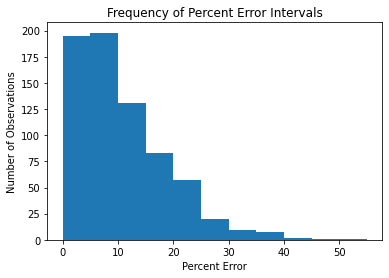

In [49]:
plt.hist(ops_percent_error['Percent Error'],bins=pe_bin_cutoffs)
plt.title('Frequency of Percent Error Intervals')
plt.xlabel('Percent Error')
plt.ylabel('Number of Observations')

In [50]:
num_overestimates = 0
num_underestimates = 0
one_percent = 0
three_percent = 0
five_percent = 0
ten_percent = 0
gt_ten_percent = 0
gt_twenty_percent = 0
for row in range(0,len(ops_percent_error)):
    if (ops_percent_error['Residual'][row] < 0):
        num_overestimates = num_overestimates + 1
    if (ops_percent_error['Residual'][row] > 0):
        num_underestimates = num_underestimates + 1
    if (abs(ops_percent_error['Percent Error'][row]) <= 1):
        one_percent = one_percent + 1
    if (1 < abs(ops_percent_error['Percent Error'][row]) <= 3):
        three_percent = three_percent + 1
    if (3 < abs(ops_percent_error['Percent Error'][row]) <= 5):
        five_percent = five_percent + 1
    if (5 < abs(ops_percent_error['Percent Error'][row]) <= 10):
        ten_percent = ten_percent + 1
    if (10 < abs(ops_percent_error['Percent Error'][row]) = 20):
        gt_ten_percent = gt_ten_percent + 1
    if (20 < abs(ops_percent_error['Percent Error'][row])):
        gt_twenty_percent = gt_twenty_percent + 1

percent_overestimated = round((num_overestimates/len(ops_percent_error))*100,2)
print("Percent of observations which were overestimated: " + str(percent_overestimated))
percent_underestimated = round((num_underestimates/len(ops_percent_error))*100,2)
print("Percent of observations which were underestimated: " + str(percent_underestimated))
one_percent_p = round((one_percent/len(ops_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than one percent: " + str(one_percent_p))
three_percent_p = round((three_percent/len(ops_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between one and three percent: " + str(three_percent_p))
five_percent_p = round((five_percent/len(ops_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between three and five percent: " + str(five_percent_p))
ten_percent_p = round((ten_percent/len(ops_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between five and ten percent: " + str(ten_percent_p))
gt_ten_percent_p = round((gt_ten_percent/len(ops_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between ten and twenty percent: " + str(gt_ten_percent_p))
gt_twenty_percent_p = round((gt_twenty_percent/len(ops_percent_error))*100,2)
print("Percent of observations with absolute value of percent error greater than twenty percent: " + str(gt_twenty_percent_p))

SyntaxError: invalid syntax (<ipython-input-50-c468d59b9c70>, line 22)

In [ ]:
print("Maximum OPS+ Residual: " + str(round(ops_percent_error['Residual'].max(),2)))

In [ ]:
print("Minimum OPS+ Residual: " + str(round(ops_percent_error['Residual'].min(),2)))

In [ ]:
r_bin_cutoffs = [-55,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55]

In [ ]:
plt.hist(ops_percent_error['Residual'],bins=r_bin_cutoffs)
plt.title('Frequency of Residual Intervals')
plt.xlabel('Residual Intervals')
plt.ylabel('Number of Observations')

In [ ]:
residual_g1 = 0
residual_g2 = 0
residual_g3 = 0
residual_g4 = 0
residual_g5 = 0
residual_g6 = 0
residual_g7 = 0
residual_g8 = 0
residual_g9 = 0
for row in range(0,len(ops_percent_error)):
    if (abs(ops_percent_error['Residual'][row]) < 5):
        residual_g1 = residual_g1 + 1
    if (5 < abs(ops_percent_error['Residual'][row]) < 10):
        residual_g2 = residual_g2 + 1
    if (10 < abs(ops_percent_error['Residual'][row]) < 15):
        residual_g3 = residual_g3 + 1
    if (15 < abs(ops_percent_error['Residual'][row]) < 20):
        residual_g4 = residual_g4 + 1
    if (20 < abs(ops_percent_error['Residual'][row]) < 25):
        residual_g5 = residual_g5 + 1
    if (25 < abs(ops_percent_error['Residual'][row]) < 30):
        residual_g6 = residual_g6 + 1
    if (30 < abs(ops_percent_error['Residual'][row]) < 35):
        residual_g7 = residual_g7 + 1
    if (35 < abs(ops_percent_error['Residual'][row]) < 40):
        residual_g8 = residual_g8 + 1
    if (40 < abs(ops_percent_error['Residual'][row])):
        residual_g9 = residual_g9 + 1

residual_g1_p = round((residual_g1/len(ops_percent_error))*100,2)
print("Percent of observations with residual less than 5: " + str(residual_g1_p))
residual_g2_p = round((residual_g2/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 5 and 10: " + str(residual_g2_p))
residual_g3_p = round((residual_g3/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 10 and 15: " + str(residual_g3_p))
residual_g4_p = round((residual_g4/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 15 and 20: " + str(residual_g4_p))
residual_g5_p = round((residual_g5/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 20 and 25: " + str(residual_g5_p))
residual_g6_p = round((residual_g6/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 25 and 30: " + str(residual_g6_p))
residual_g7_p = round((residual_g7/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 30 and 35: " + str(residual_g7_p))
residual_g8_p = round((residual_g8/len(ops_percent_error))*100,2)
print("Percent of observations with residual between 35 and 40: " + str(residual_g8_p))
residual_g9_p = round((residual_g9/len(ops_percent_error))*100,2)
print("Percent of observations with residual greater than 40: " + str(residual_g9_p))

We are moderately satisfied with this OPS+ model. The percent error results imply that it is fairly inaccurate, but when you look at the distribution of the residuals, about half of them are within 10 of the actual value, which seems to be a fairly low error. However, roughly half have residuals greater than this value, which is undesirable. The model appears to be decent but has significant error for a significant amount of observations.